In [3]:
import torch
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pysr

In [4]:
# feature_nn = torch.load('21101_feature_nn.pt')

In [ ]:
# the model regularized with l1 penalty (but I forgot to take an absolute value, so its actually just regularized to have very negative weights)
feature_nn = torch.load('63524_feature_nn.pt')

In [ ]:
feature_nn = torch.load('61267_feature_nn.pt')

In [ ]:
results_path = 'hall_of_fame_f2_21101_0_1.pkl'
results = pickle.load(open(results_path, 'rb'))
results = results.equations_[0]  # equations for predicting the mean

In [ ]:
labels = ['time', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno', 'a1', 'e1', 'i1', 'cos_Omega1', 'sin_Omega1', 'cos_pomega1', 'sin_pomega1', 'cos_theta1', 'sin_theta1', 'a2', 'e2', 'i2', 'cos_Omega2', 'sin_Omega2', 'cos_pomega2', 'sin_pomega2', 'cos_theta2', 'sin_theta2', 'a3', 'e3', 'i3', 'cos_Omega3', 'sin_Omega3', 'cos_pomega3', 'sin_pomega3', 'cos_theta3', 'sin_theta3', 'm1', 'm2', 'm3', 'nan_mmr_near', 'nan_mmr_far', 'nan_megno']

# not all of these labels are actually used. for training, these inputs are zeroed out, but still passed in as zeroes.
# ideally, the linear layer ignores them, which does happen if i do l1 regularization to it
skipped = ['nan_mmr_near', 'nan_mmr_far', 'nan_megno', 'e+_near', 'e-_near', 'max_strength_mmr_near', 'e+_far', 'e-_far', 'max_strength_mmr_far', 'megno']

In [ ]:
# this gives the (n_features, n_inputs) matrix of the linear transformation used as f1
input_linear = feature_nn.weight.detach().numpy()
input_linear.shape

(20, 41)

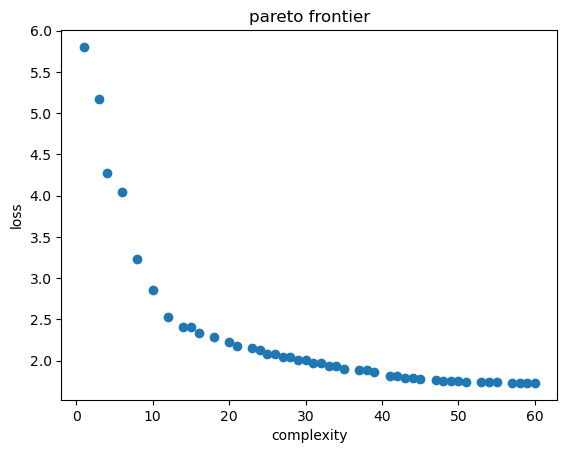

In [ ]:
# plot the pareto curve for results
x = results['complexity']
y = results['loss']
# plot the pareto frontier
plt.scatter(x, y)
plt.xlabel('complexity')
plt.ylabel('loss')
plt.title('pareto frontier')
plt.show()


In [ ]:
results

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,5.803489,0.000000,6.9754324,6.97543240000000,PySRFunction(X=>6.97543240000000)
1,3,5.177424,0.057076,(7.5690565 - s16),7.5690565 - s16,PySRFunction(X=>7.5690565 - s16)
2,4,4.270199,0.192647,(4.8838587 - log(s4)),4.8838587 - log(s4),PySRFunction(X=>4.8838587 - log(s4))
3,6,4.039780,0.027735,((5.7062464 - log(s4)) - s11),-s11 - log(s4) + 5.7062464,PySRFunction(X=>-s11 - log(s4) + 5.7062464)
4,8,3.233104,0.111374,((4.6465693 - log(s4)) + (0.20312724 * m0)),0.20312724*m0 - log(s4) + 4.6465693,PySRFunction(X=>0.20312724*m0 - log(s4) + 4.64...
5,10,2.853313,0.062481,((4.1890907 - log(s4)) + (0.15476178 * (m5 + m...,0.15476178*m0 + 0.15476178*m5 - log(s4) + 4.18...,PySRFunction(X=>0.15476178*m0 + 0.15476178*m5 ...
6,12,2.530805,0.059972,((4.045565 - log(s4)) + (0.17270839 * ((m5 + m...,0.17270839*m0 + 0.17270839*m13 + 0.17270839*m5...,PySRFunction(X=>0.17270839*m0 + 0.17270839*m13...
7,14,2.409025,0.024658,((4.1638684 - log(s4)) + (0.15841591 * ((m5 - ...,0.15841591*m0 + 0.15841591*m13 - 0.15841591*m1...,PySRFunction(X=>0.15841591*m0 + 0.15841591*m13...
8,15,2.409011,0.000006,((4.1638684 - log(s4)) + (sin(0.15841591) * ((...,0.157754150509143*m0 + 0.157754150509143*m13 -...,PySRFunction(X=>0.157754150509143*m0 + 0.15775...
9,16,2.328622,0.033940,((4.1638684 - log(s4)) + (0.15841591 * (((m0 -...,0.15841591*m0 + 0.15841591*m13 - 0.15841591*m1...,PySRFunction(X=>0.15841591*m0 + 0.15841591*m13...


In [ ]:
# let's interpret the complexity 8 equation as an example
# get entry where complexity = 8
results[results['complexity'] == 8]


,complexity,loss,score,equation,sympy_format,lambda_format
4,8,3.233104,0.111374,((4.6465693 - log(s4)) + (0.20312724 * m0)),0.20312724*m0 - log(s4) + 4.6465693,PySRFunction(X=>0.20312724*m0 - log(s4) + 4.64...


In [ ]:
# m_i is the mean of the i'th feature, s_i is the standard deviation
# get the linear transformation that creates feature i
def linear_transformation(i):
    return input_linear[i]

In [ ]:
linear_transformation(0)

array([ 1.1173316e-04, -6.5010412e-05, -1.3654784e-03, -6.0709723e-04,
        1.3701079e-04, -1.8192350e-04,  7.5350888e-04, -6.0754392e-04,
        1.2246456e-03, -1.0747115e-02, -1.3253178e-02,  8.0801146e-03,
        9.0512130e-03, -1.3046660e-03, -4.1089347e-03,  1.6438892e-03,
       -6.9491746e-04,  4.5296580e-02,  7.6173434e-05,  2.7739329e-03,
        7.1556801e-03, -2.5749537e-03,  4.8126206e-03, -8.2171941e-03,
        3.8436011e-03,  4.8223179e-04,  1.2010874e+00, -9.6241077e-03,
       -3.2605868e-02, -6.9787125e-03, -5.9108874e-03, -3.3094005e-03,
        1.1036288e-03, -7.3375651e-03, -3.0173102e-04, -3.3617542e+00,
        1.3134351e-01, -5.4734564e-01, -1.1440601e-03,  5.7204935e-04,
       -2.6467256e-04], dtype=float32)

In [ ]:
# let's make the linear transformation a bit easier to read
def format_num(x):
    if abs(x) > 0.1:
        return f'{x:.2f}'
    if abs(x) > 0.01:
        return f'{x:.3f}'
    elif abs(x) > 0.001:
        return f'{x:.4f}'
    else:
        return f'{x:.2e}'

format_vec = np.vectorize(format_num)

In [ ]:
format_vec(linear_transformation(0))

array(['1.12e-04', '-6.50e-05', '-0.0014', '-6.07e-04', '1.37e-04',
       '-1.82e-04', '7.54e-04', '-6.08e-04', '0.0012', '-0.011', '-0.013',
       '0.0081', '0.0091', '-0.0013', '-0.0041', '0.0016', '-6.95e-04',
       '0.045', '7.62e-05', '0.0028', '0.0072', '-0.0026', '0.0048',
       '-0.0082', '0.0038', '4.82e-04', '1.20', '-0.0096', '-0.033',
       '-0.0070', '-0.0059', '-0.0033', '0.0011', '-0.0073', '-3.02e-04',
       '-3.36', '0.13', '-0.55', '-0.0011', '5.72e-04', '-2.65e-04'],
      dtype='<U9')

In [ ]:
# now we can write it as a combination of the input features
# we'll sort the features by their absolute value to make it a bit easier to read
def feature_equation(i):
    transformation = linear_transformation(i)
    sorted_ixs = np.argsort(np.abs(transformation))[::-1]
    return [format_num(transformation[i]) + ' * ' + labels[i] for i in sorted_ixs if transformation[i] != 0]

In [ ]:
results[results['complexity'] == 8]

,complexity,loss,score,equation,sympy_format,lambda_format
4,8,3.233104,0.111374,((4.6465693 - log(s4)) + (0.20312724 * m0)),0.20312724*m0 - log(s4) + 4.6465693,PySRFunction(X=>0.20312724*m0 - log(s4) + 4.64...


In [ ]:
for i in range(input_linear.shape[0]):
    print(f'feature {i}:')
    print(' +\n'.join(feature_equation(i)[:10]))
    print('+ ... (smaller terms omitted)')
    print()

feature 0:
-3.36 * m1 +
1.20 * a3 +
-0.55 * m3 +
0.13 * m2 +
0.045 * a2 +
-0.033 * i3 +
-0.013 * i1 +
-0.011 * e1 +
-0.0096 * e3 +
0.0091 * sin_Omega1
+ ... (smaller terms omitted)

feature 1:
-1.37 * m2 +
0.34 * i2 +
0.16 * i3 +
0.15 * e1 +
0.046 * i1 +
0.024 * cos_pomega1 +
-0.022 * cos_Omega2 +
0.020 * sin_pomega3 +
-0.018 * cos_Omega1 +
-0.014 * cos_theta2
+ ... (smaller terms omitted)

feature 2:
1.36 * e2 +
-1.09 * a3 +
0.75 * e3 +
0.47 * e1 +
0.059 * a1 +
0.029 * i3 +
-0.011 * i1 +
0.011 * sin_pomega1 +
-0.0087 * cos_pomega2 +
-0.0068 * cos_pomega3
+ ... (smaller terms omitted)

feature 3:
-0.40 * time +
-0.30 * sin_Omega2 +
0.27 * sin_Omega3 +
0.17 * i1 +
0.14 * i2 +
0.12 * cos_Omega2 +
-0.082 * cos_pomega2 +
0.075 * sin_pomega1 +
0.071 * sin_pomega2 +
-0.065 * cos_pomega3
+ ... (smaller terms omitted)

feature 4:
-0.56 * sin_pomega2 +
0.50 * sin_pomega1 +
0.17 * cos_pomega2 +
0.16 * i1 +
-0.067 * e2 +
-0.066 * sin_Omega3 +
0.053 * sin_pomega3 +
-0.053 * i3 +
0.052 * i2 +
0.038

In [ ]:
print(feature_equation(4))

['-0.56 * sin_pomega2', '0.50 * sin_pomega1', '0.17 * cos_pomega2', '0.16 * i1', '-0.067 * e2', '-0.066 * sin_Omega3', '0.053 * sin_pomega3', '-0.053 * i3', '0.052 * i2', '0.038 * cos_pomega3', '0.027 * cos_Omega3', '0.022 * cos_theta1', '0.019 * time', '-0.0081 * cos_theta3', '0.0073 * sin_Omega2', '-0.0070 * sin_theta3', '-0.0062 * cos_Omega1', '-0.0053 * cos_pomega1', '-0.0048 * sin_theta2', '-0.0023 * e3', '-0.0018 * cos_Omega2', '0.0018 * m2', '0.0013 * a2', '0.0013 * a3', '-0.0011 * sin_Omega1', '8.68e-04 * sin_theta1', '6.59e-04 * cos_theta2', '6.38e-04 * m1', '-5.91e-04 * e1', '4.29e-04 * nan_mmr_far', '-3.17e-04 * e+_far', '-1.80e-04 * e-_far', '-1.47e-04 * megno', '-1.23e-04 * a1', '-1.18e-04 * max_strength_mmr_near', '-9.97e-05 * max_strength_mmr_far', '-4.68e-05 * e-_near', '4.05e-05 * m3', '2.83e-05 * nan_megno', '-2.75e-05 * e+_near', '1.74e-05 * nan_mmr_near']


In [ ]:
def feature_equation2(i):
    transformation = linear_transformation(i)
    sorted_ixs = np.argsort(np.abs(transformation))[::-1]
    return ', '.join([format_num(transformation[i]) for i in sorted_ixs if transformation[i] != 0])
